In [16]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

from scipy import stats

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)
%matplotlib inline


In [2]:

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [37]:
music.head()

,duration,loudness,bpm
0,184,18,105
1,134,34,90
2,243,43,78
3,186,36,75
4,122,22,120


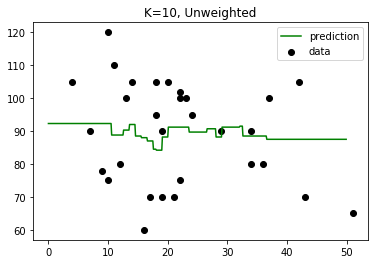

In [6]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
sort_ld = music.sort_values(by = 'loudness', ascending=True) 

X = sort_ld.loudness.values.reshape(-1, 1)

Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')

plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

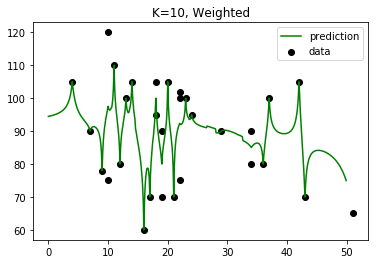

In [8]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
sort_ld = music.sort_values(by = 'loudness', ascending=True) 

X = sort_ld.loudness.values.reshape(-1, 1)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [10]:
X = pd.DataFrame(music.loudness)
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


In [62]:
music[['loudness', 'duration']].describe()

,loudness,duration
count,30.000000,30.000000
mean,21.900000,222.966667
std,11.645185,92.743057
min,4.000000,102.000000
25%,13.250000,168.500000
50%,19.500000,197.500000
75%,27.750000,261.250000
max,51.000000,403.000000


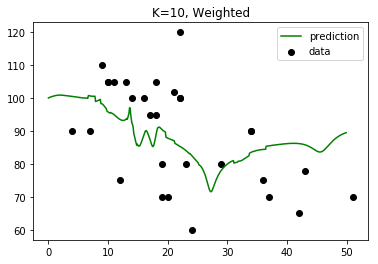

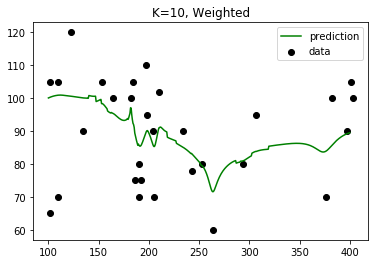

In [12]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X1 = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})

X = pd.DataFrame(music[['loudness', 'duration']])

Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

D = np.linspace(100,400,500)[:, np.newaxis]

Z = np.c_[T, D]

Y_ = knn_w.predict(Z)


plt.scatter(X['loudness'], Y, c='k', label='data')
plt.plot(T, Y_ , c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

plt.scatter(X['duration'], Y, c='k', label='data')
plt.plot(D, Y_ , c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()



# Add feature, k = 10 , weighted and unweighted 

In [13]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')


X = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})
Y = music.bpm

knn.fit(X, Y)
knn_w.fit(X, Y)


score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.11 (+/- 0.50)
Weighted Accuracy: -0.11 (+/- 1.05)


# k = 5, cv = 5

In [12]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')


X = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})
Y = music.bpm

knn.fit(X, Y)
knn_w.fit(X, Y)


score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.37 (+/- 1.46)
Weighted Accuracy: -0.43 (+/- 1.99)


# k = 5, cv = 10

In [74]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')


X = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})
Y = music.bpm

knn.fit(X, Y)
knn_w.fit(X, Y)


score = cross_val_score(knn, X, Y, cv=10)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=10)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -15.95 (+/- 94.70)
Weighted Accuracy: -21.08 (+/- 125.16)


# k = 3, cv = 10

In [110]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=3, weights='distance')


X = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})
Y = music.bpm

knn.fit(X, Y)
knn_w.fit(X, Y)


score = cross_val_score(knn, X, Y, cv=10)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=10)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -31.25 (+/- 186.72)
Weighted Accuracy: -34.05 (+/- 202.49)


# k = 10, cv = 5

In [77]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='uniform')


X = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})
Y = music.bpm

knn.fit(X, Y)
knn_w.fit(X, Y)


score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.11 (+/- 0.50)
Weighted Accuracy: -0.11 (+/- 0.50)


# k = 1, cv = 5

In [111]:
knn = neighbors.KNeighborsRegressor(n_neighbors=1)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=1, weights='uniform')


X = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})
Y = music.bpm

knn.fit(X, Y)
knn_w.fit(X, Y)


score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -1.73 (+/- 4.45)
Weighted Accuracy: -1.73 (+/- 4.45)
